In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
train_df = pd.read_csv(r"C:\Users\neepu\train.csv")


In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Varaible Identification

### Dependent Variable-
Survived

### Independent Variables-
Independent Variable-
Passenger ID,
Pclass,
Name,
Age,
Parch,
Ticket,
Fare,
Cabin,
Embarked.


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Catagorical
Sex,Emabarked


# Continuous
age,fare,ticket

# Discreet
Survived,Pclass,Sibsp,Parch,Cabin

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harper, Miss. Annie Jessie ""Nina""",male,347082,G6,S
freq,1,577,7,4,644


1.Names are unique across the dataset (count=unique=891)
2.Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
3.Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
4.Embarked takes three possible values. S port used by most passengers (top=S)
5.Ticket feature has high ratio (22%) of duplicate values (unique=681).

# ------------------------------------------------------------------------------------------

# Univariate Analysis 

1.Age and Sex

Text(0.5, 1.0, 'Male')

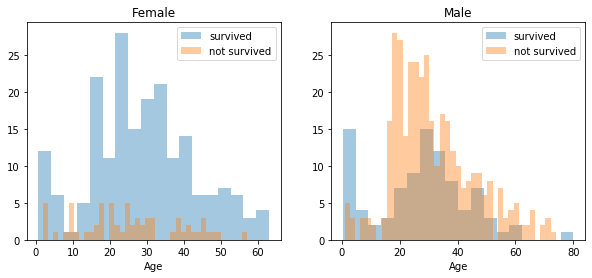

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),bins = 18,label =survived,ax = axes[0],kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),bins = 40,label = not_survived,ax = axes[0],kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(),bins =18,label = survived,ax = axes[1],kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),bins =40,label = not_survived,ax= axes[1],kde = False)
ax.legend()
ax.set_title('Male')
                       

men have a high probability of survival when they are between 18 and 30 years old

women have the probability in between 14 and 40.


### Embarked,Pclass and Sex

C:\TURBOC3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


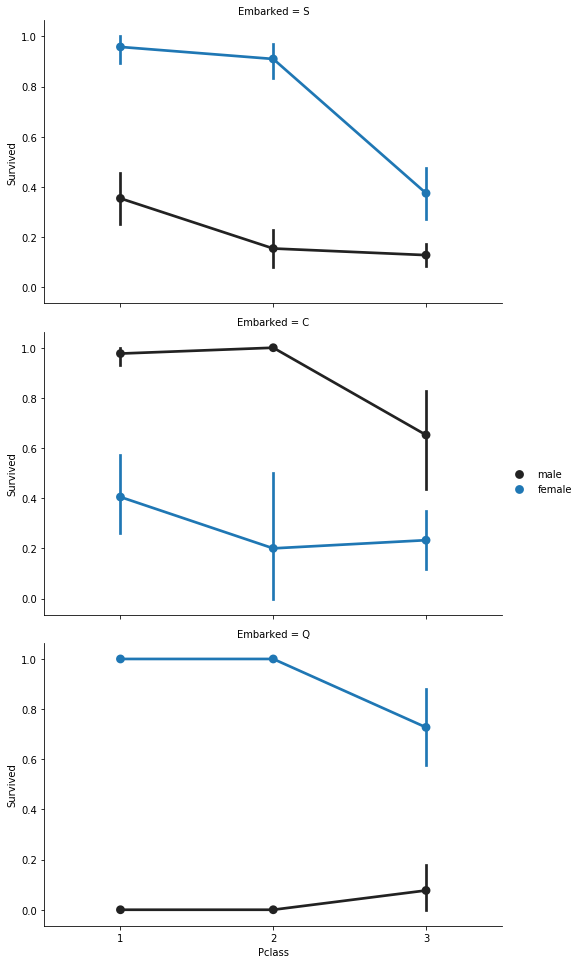

In [10]:
FacetGrid = sns.FacetGrid(train_df,row ='Embarked',size = 4.5,aspect = 1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palatte = None, order=None,hue_order = None)
FacetGrid.add_legend()

Women have high rate of survival when they are at port Q and S while men have high rate of survival when they are at port C

4.Pclass

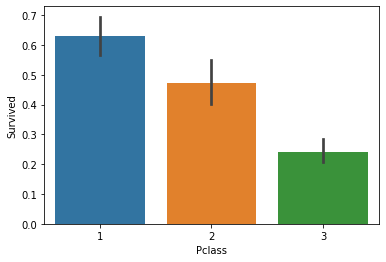

In [11]:
sns.barplot(x = 'Pclass',y = 'Survived',data = train_df)

1st class person has high chance of survival

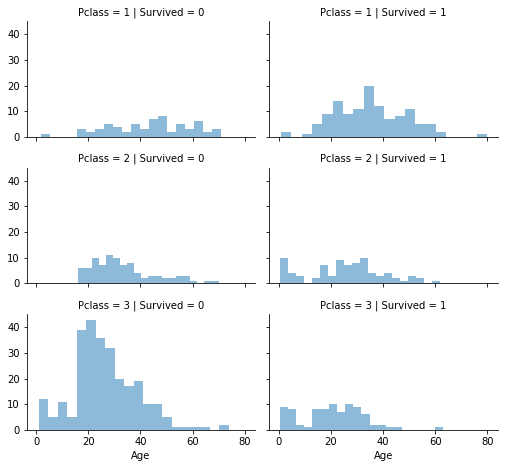

In [12]:
grid = sns.FacetGrid(train_df,col= 'Survived',row = 'Pclass',size = 2.2,aspect = 1.6)
grid.map(plt.hist,'Age',alpha = 0.5,bins = 20)
grid.add_legend()

The plot above shows that pclass 3 persons have high probability that they will not survive

5.SibSp and Parch:

In [13]:
data = [train_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone'] =0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\TURBOC3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


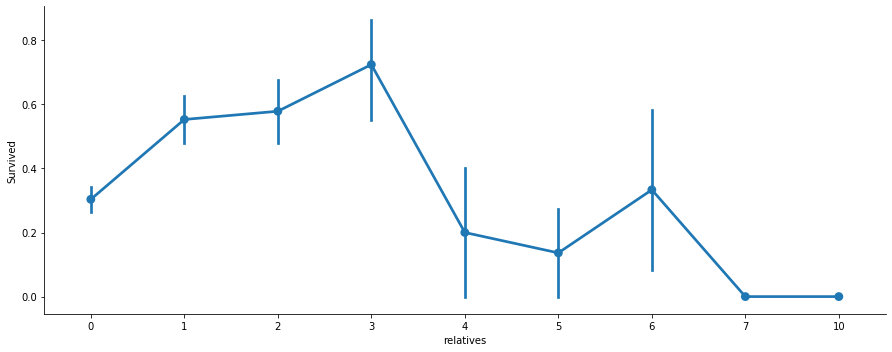

In [14]:
axes = sns.factorplot('relatives','Survived',data = train_df,aspect = 2.5)

# Bivariate Analysis 

In [15]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by ='Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[["SibSp","Survived"]].groupby(['SibSp'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[["Parch","Survived"]].groupby(['Parch'],as_index= False).mean().sort_values(by = 'Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\TURBOC3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


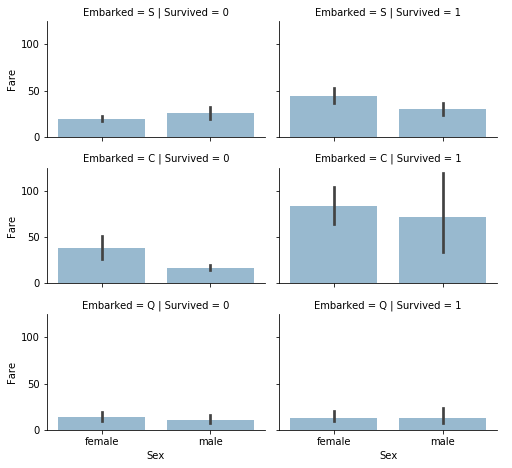

In [18]:
grid = sns.FacetGrid(train_df,row='Embarked',col = 'Survived',size = 2.2,aspect  = 1.6)
grid.map(sns.barplot,'Sex','Fare',alpha = .5)
grid.add_legend()

# Missing Value Treatment 

Cabin and Ticket has hig duplicate values ...So we can drop them.

In [19]:
train_df = train_df.drop(['Ticket','Cabin'],axis = 1)

In [20]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,0,1


We can extract the title of particular persons so that we can group them according to their frequencies

In [21]:
data = [train_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)


In [22]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


Age 

In [23]:
data = [train_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

Since Embarked feature has two missing values ,we will fill it with most common one

In [24]:
train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [25]:
common_value = 'S'
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# Dummy Variable Creation 

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
Title          891 non-null int64
dtypes: float64(1), int32(2), int64(7), object(2)
memory usage: 76.7+ KB


In the above we see that 'Fare' is float and there are 4 catagorical variables-Name,Sex,Ticket and Embarked.

Fare

In [27]:
data = [train_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Name

We already extracted Titles from names in input no 107

Sex

In [28]:
genders = {"male":0, "female":1}
data = [train_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

Ticket

Ticket attribute has 681 unique tickets,it will be difficult to convert them into useful catagories.SO we can drop it from dataset which we did in input no 94

In [29]:
ports = {"S": 0,"C": 1,"Q": 2}
data = [train_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


# Creating New Catagories

1.Age

In [30]:
data = [train_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

2.Fare

In [31]:
data = [train_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

Fare per person

In [32]:

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [33]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Fare_Per_Person
0,1,0,3,0,2,1,0,0,0,1,0,1,0
1,2,1,1,1,5,1,0,3,1,1,0,3,1
2,3,1,3,1,3,0,0,0,0,0,1,2,0
3,4,1,1,1,5,1,0,3,0,1,0,3,1
4,5,0,3,0,5,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,3,0,0,1,0,0,1,5,1
887,888,1,1,1,2,0,0,2,0,0,1,2,2
888,889,0,3,1,5,1,2,2,0,3,0,2,0
889,890,1,1,0,3,0,0,2,1,0,1,1,2
